In [93]:
import numpy as np
import re
import pandas as pd
# import xgboost
from sklearn import cross_validation
from itertools import chain
from sklearn import ensemble
from sklearn.metrics import accuracy_score

In [72]:
%matplotlib inline
import matplotlib as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [5]:
path = '/home/andrew/Dota_set_2/DotaParser/DOTA_parsed.txt'
t22_path_w = 'C:/Users/user/Downloads/DotaParser/DOTA_parsed.txt'
t22_path_h = 'D:/Projects/DotaParser/DOTA_parsed.txt'

In [6]:
with open(t22_path_h, 'r') as f:
    data = f.readlines()
    print(len(data))

567766


In [7]:
data[:5]

['2771431315, 1, 96, 3, 18, 48, 76, 95, 73, 110, 1, 30, 1, 1141, 188, 0,\n',
 '2771421222, 3, 48, 28, 45, 37, 99, 62, 26, 69, 92, 88, 0, 1044, 161, 7,\n',
 '2771421175, 22, 11, 102, 56, 93, 27, 28, 5, 16, 17, 104, 1, 1303, 123, 7,\n',
 '2771420362, 3, 84, 8, 66, 95, 108, 28, 54, 76, 41, 87, 1, 1453, 227, 7,\n',
 '2771420136, 22, 1, 99, 104, 20, 44, 6, 59, 50, 84, 19, 0, 1097, 121, 7,\n']

In [49]:
#for x, each in enumerate(data):
#    data[x] = data[x].split(', ')
# Че за мутная тема?
data_split = [row.split(',\n')[:-1][0].split(', ') for row in data] 
data_split[:1]

[['2771431315',
  '1',
  '96',
  '3',
  '18',
  '48',
  '76',
  '95',
  '73',
  '110',
  '1',
  '30',
  '1',
  '1141',
  '188',
  '0']]

In [50]:
set(len(x) for x in data_split)

{16, 17}

In [51]:
sum([1 for x in data_split if len(x)==16])

5225

In [52]:
sum([1 for x in data_split if len(x)==17])

562541

In [53]:
# cut 16

In [54]:
data_short = [x[:-1] if len(x)==17 else x for x in data_split ]
data_short[0]

['2771431315',
 '1',
 '96',
 '3',
 '18',
 '48',
 '76',
 '95',
 '73',
 '110',
 '1',
 '30',
 '1',
 '1141',
 '188',
 '0']

In [57]:
set(len(x) for x in data_short)

{16}

In [58]:
# From str type to int
data_short = [[int(x) for x in match] for match in data_short]
data_short[0]

[2771431315, 1, 96, 3, 18, 48, 76, 95, 73, 110, 1, 30, 1, 1141, 188, 0]

In [66]:
dota_df = pd.DataFrame(data_short, columns=['match_id', 'game_mode', '1', '2', '3', '4', '5', '6', '7', '8', '9',
                 '10', 'radiant_win', 'duration', 'cluster', 'lobby_type'])
#dota_df.columns=['match_id', 'game_mode', '1', '2', '3', '4', '5', '6', '7', '8', '9',
#                 '10', 'radiant_win', 'duration', 'cluster', 'lobby_type']
dota_df.head()

,match_id,game_mode,1,2,3,4,5,6,7,8,9,10,radiant_win,duration,cluster,lobby_type
0,2771431315,1,96,3,18,48,76,95,73,110,1,30,1,1141,188,0
1,2771421222,3,48,28,45,37,99,62,26,69,92,88,0,1044,161,7
2,2771421175,22,11,102,56,93,27,28,5,16,17,104,1,1303,123,7
3,2771420362,3,84,8,66,95,108,28,54,76,41,87,1,1453,227,7
4,2771420136,22,1,99,104,20,44,6,59,50,84,19,0,1097,121,7


In [67]:
dota_df['duration'] = dota_df['duration'].divide(60)
print(len(dota_df))
dota_df.head()

567766


,match_id,game_mode,1,2,3,4,5,6,7,8,9,10,radiant_win,duration,cluster,lobby_type
0,2771431315,1,96,3,18,48,76,95,73,110,1,30,1,19.016667,188,0
1,2771421222,3,48,28,45,37,99,62,26,69,92,88,0,17.400000,161,7
2,2771421175,22,11,102,56,93,27,28,5,16,17,104,1,21.716667,123,7
3,2771420362,3,84,8,66,95,108,28,54,76,41,87,1,24.216667,227,7
4,2771420136,22,1,99,104,20,44,6,59,50,84,19,0,18.283333,121,7


In [68]:
df_cut_by_time = dota_df[dota_df['duration'] >20 ]
print(len(df_cut_by_time))
df_cut_by_time.head()

563296


,match_id,game_mode,1,2,3,4,5,6,7,8,9,10,radiant_win,duration,cluster,lobby_type
2,2771421175,22,11,102,56,93,27,28,5,16,17,104,1,21.716667,123,7
3,2771420362,3,84,8,66,95,108,28,54,76,41,87,1,24.216667,227,7
6,2771419193,4,23,63,108,47,79,30,90,32,42,68,0,21.316667,138,0
7,2771418887,3,73,93,71,9,23,2,84,87,11,44,0,21.650000,224,7
8,2771417621,1,102,11,104,31,18,46,25,73,4,93,1,21.833333,121,0


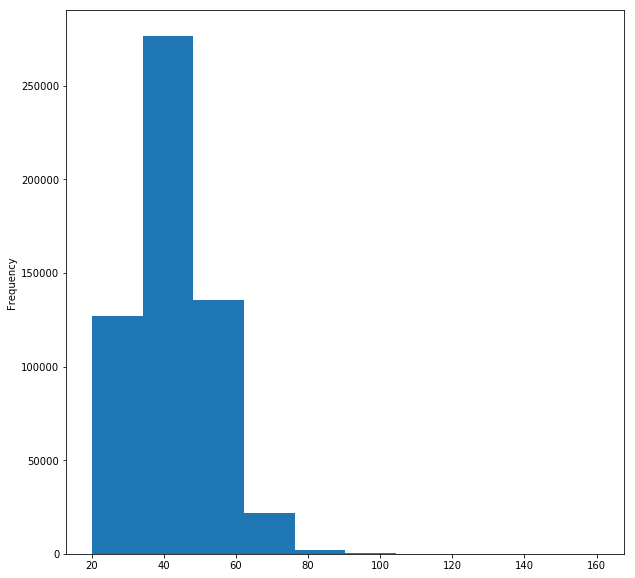

In [74]:
df_cut_by_time['duration'].plot.hist()

In [82]:
x_train = dota_df[['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']]
x_train.head()

,1,2,3,4,5,6,7,8,9,10
0,96,3,18,48,76,95,73,110,1,30
1,48,28,45,37,99,62,26,69,92,88
2,11,102,56,93,27,28,5,16,17,104
3,84,8,66,95,108,28,54,76,41,87
4,1,99,104,20,44,6,59,50,84,19


In [ ]:
x_train_chain = list(chain.from_iterable(list(x_train.values)))
x_train_chain

In [92]:
classifier = ensemble.GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100,
                           subsample=1.0, criterion='friedman_mse', min_samples_split=2,
                           min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3,
                           min_impurity_split=1e-07, init=None, random_state=None,
                           max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False,
                           presort='auto')

In [362]:
x_train_2

array(['62', '26', '69', '92', '88'], 
      dtype='<U2')

In [363]:
y_train_out

array('0', 
      dtype='<U1')

In [84]:
classifier_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

In [85]:
clf = ensemble.GradientBoostingClassifier(**classifier_params)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,
                                                    random_state=9)